<a href="https://colab.research.google.com/github/SachinScaler/MachineLearning_Jan24/blob/main/RandomForest%2BGridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

read and Load Data

In [ ]:
!git clone https://github.com/SachinScaler/MachineLearning_Jan23.git

fatal: destination path 'MachineLearning_Jan23' already exists and is not an empty directory.


In [ ]:
import pickle
# Load data (deserialize)
with open('MachineLearning_Jan23/employee_attrition_dataset/preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('MachineLearning_Jan23/employee_attrition_dataset/X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('MachineLearning_Jan23/employee_attrition_dataset/y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('MachineLearning_Jan23/employee_attrition_dataset/y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

### DT

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# create instance of DT Class:
model = DecisionTreeClassifier(criterion='gini')

# fit model
model.fit(X_train, y_train)

# Calculate Train and Test Acc Scores
print("Train Acc:", model.score(X_train, y_train))
print("Test Acc:", model.score(X_test, y_test))

Train Acc: 1.0
Test Acc: 0.7554347826086957


In [ ]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# create instance of DT Class:
model = RandomForestClassifier(criterion='gini')

# fit model
model.fit(X_train, y_train)

# Calculate Train and Test Acc Scores
print("Train Acc:", model.score(X_train, y_train))
print("Test Acc:", model.score(X_test, y_test))

Train Acc: 1.0
Test Acc: 0.8722826086956522


# Defining parameters
         

In [ ]:
# Defining parameters -
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10,20],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10],
          "ccp_alpha":[0.1,1,10]
}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


model = RandomForestClassifier()
grid = GridSearchCV(estimator =model , # model to tuned
                    param_grid = params, # param grid
                    scoring = 'accuracy', # metric to be used for finding best value
                    cv = 3, # cross_val count
                    n_jobs=-1 # jobs to run in parrallel
                    )



In [ ]:
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 100}
Best score:  0.7397186147186147


In [ ]:
grid.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.1,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 10,
 'n_estimators': 100}

In [ ]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# create instance of DT Class:
model = RandomForestClassifier(bootstrap=True,ccp_alpha= 0.1)

# fit model
model.fit(X_train, y_train)

# Calculate Train and Test Acc Scores
print("Train Acc:", model.score(X_train, y_train))
print("Test Acc:", model.score(X_test, y_test))

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# create instance of DT Class:
model = RandomForestClassifier(**grid.best_params_)

# fit model
model.fit(X_train, y_train)

# Calculate Train and Test Acc Scores
print("Train Acc:", model.score(X_train, y_train))
print("Test Acc:", model.score(X_test, y_test))

Train Acc: 0.7121212121212122
Test Acc: 0.6657608695652174


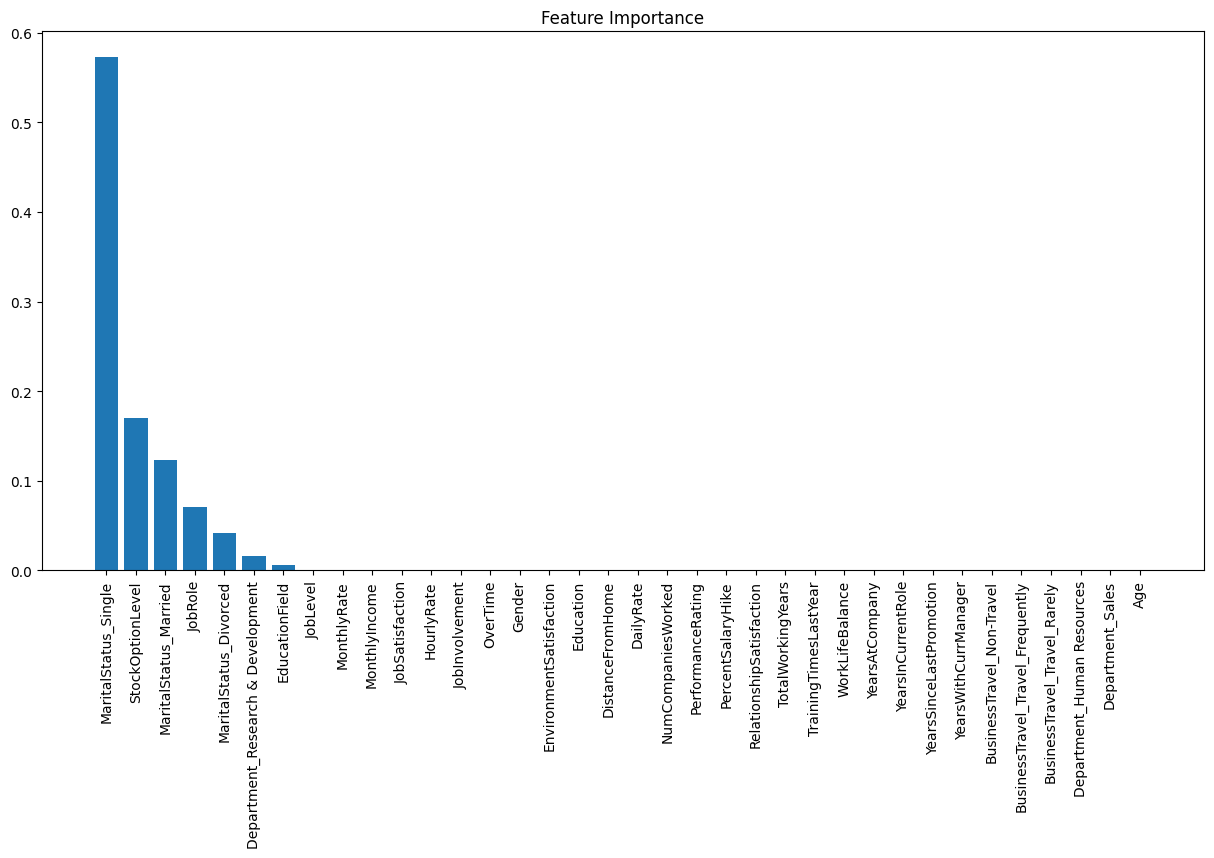

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot